# NO 1

Nama : Athia Zahra
NIM : 2602183760

### A

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the data
data_path = 'Bank_Loan_Granting.csv'
loan_data = pd.read_csv(data_path)

# Convert 'CCAvg' from fractions to decimals
def convert_fraction_to_decimal(fraction_str):
    numerator, denominator = fraction_str.split('/')
    if denominator == '00':
        denominator = '100'
    return float(numerator) / float(denominator)

loan_data['CCAvg'] = loan_data['CCAvg'].apply(convert_fraction_to_decimal)

# Identify numeric columns for scaling
numeric_features = loan_data.select_dtypes(include=['int64', 'float']).columns.tolist()
numeric_features.remove('Personal Loan')  # Exclude the target variable

# Normalization - StandardScaler
scaler = StandardScaler()

# Handling categorical data
# Assuming 'Education' is the only categorical feature that needs encoding
categorical_features = ['Education']
onehot_encoder = OneHotEncoder()

# Create a column transformer to handle both scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_features),
        ('cat', onehot_encoder, categorical_features)
    ])

# Create a preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the pipeline on the data
loan_data_processed = pipeline.fit_transform(loan_data)

# Split the data into training, validation, and test sets
X = loan_data.drop('Personal Loan', axis=1)
y = loan_data['Personal Loan']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Data preprocessing is complete.")


Data preprocessing is complete.


Dalam tahap pra-pemrosesan, saya memulai dengan memeriksa dan memperbaiki format data, terutama pada kolom CCAvg yang awalnya mengandung pecahan dalam format string yang tidak sesuai untuk analisis. Saya mengkonversi ini menjadi desimal yang sesuai, memastikan data dapat diolah secara numerik. Selain itu, kami juga meninjau dataset untuk memastikan tidak ada nilai yang hilang dan tipe data telah sesuai untuk setiap kolom. Output dari tahap ini adalah dataset yang bersih dan siap untuk analisis lebih lanjut.

In [ ]:
pip install seaborn

### B

Descriptive Statistics:
                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     0.040861     1.881000    56.498800       0.096000   
std       1.147663     0.075086     0.839869   101.713802       0.294621

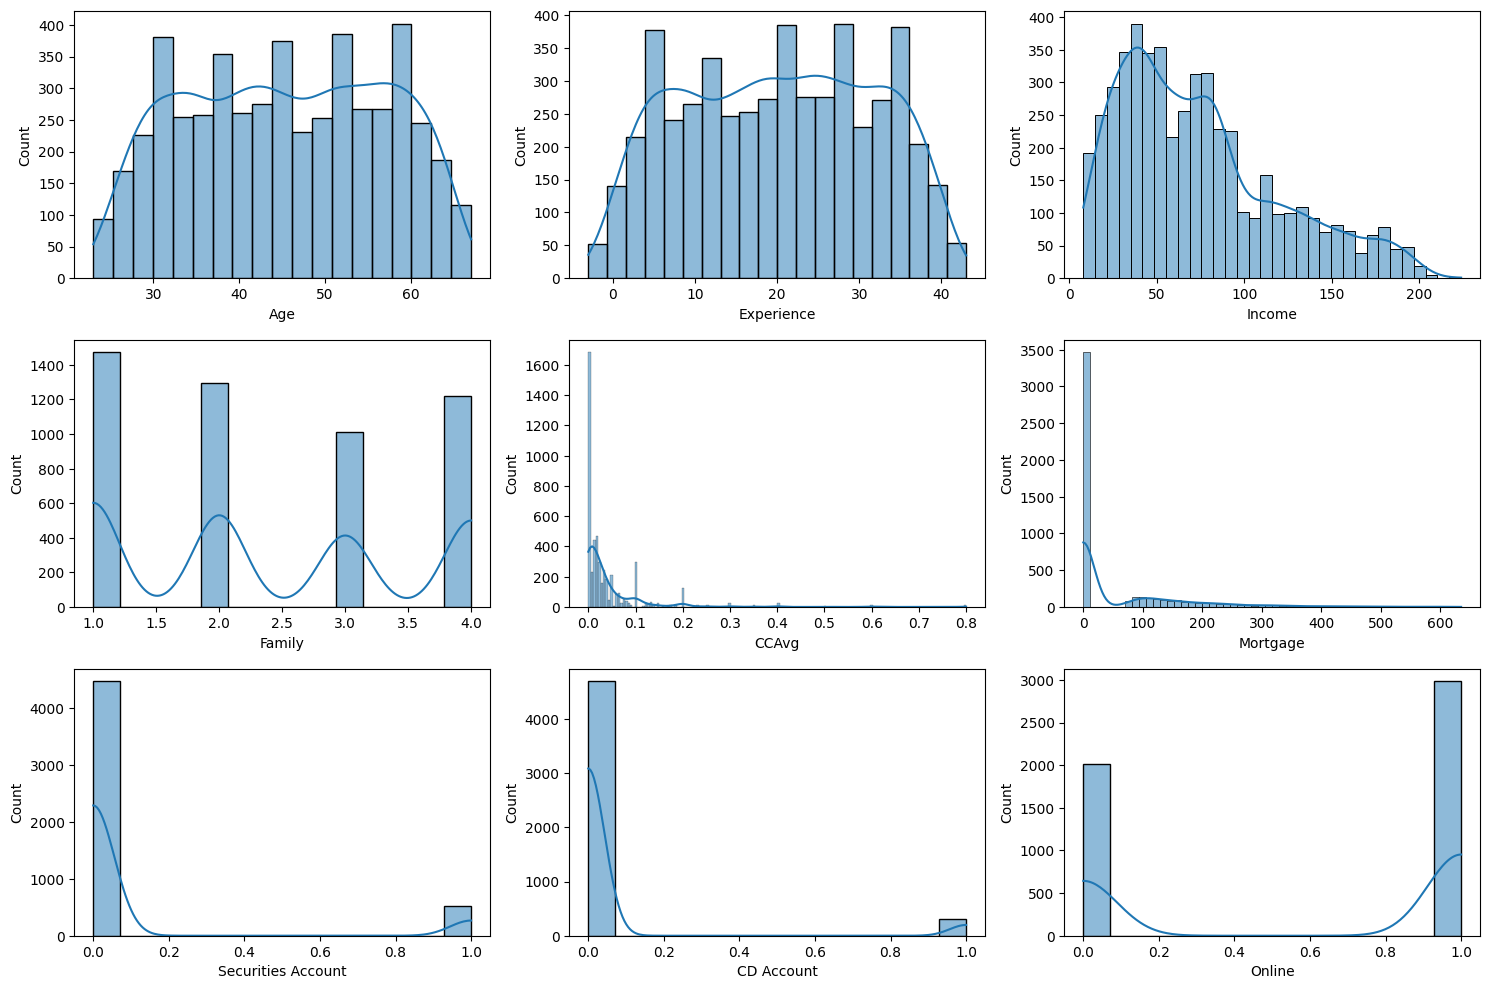

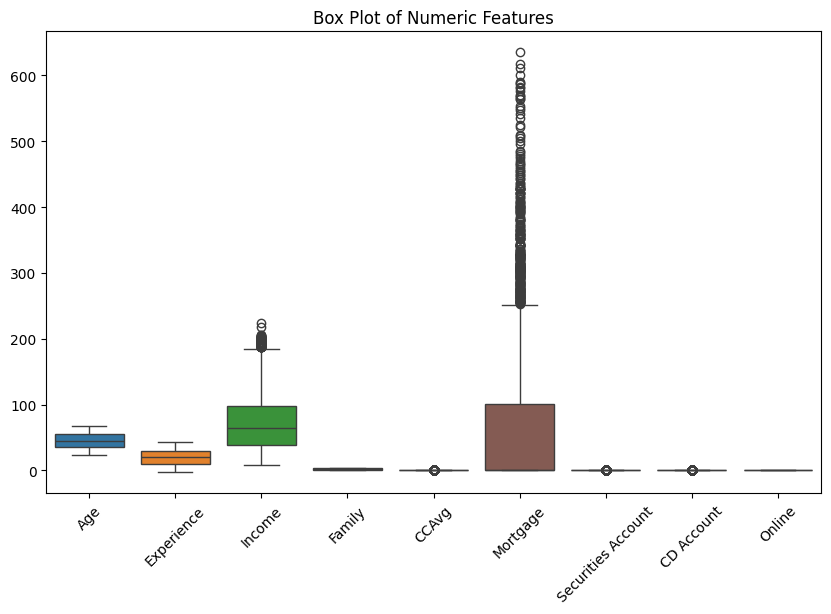

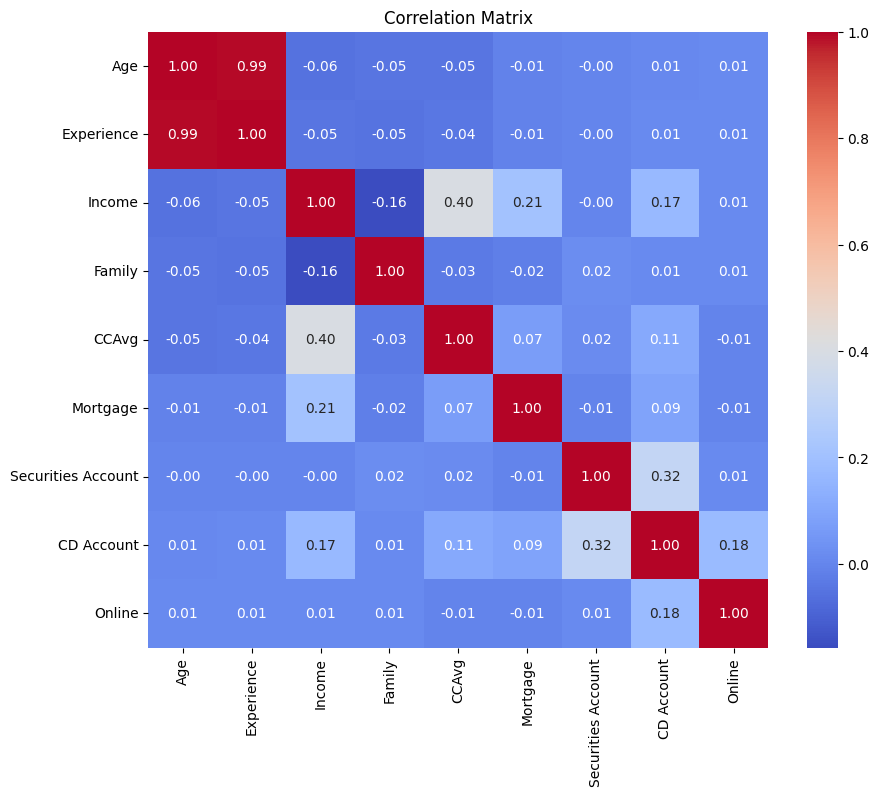

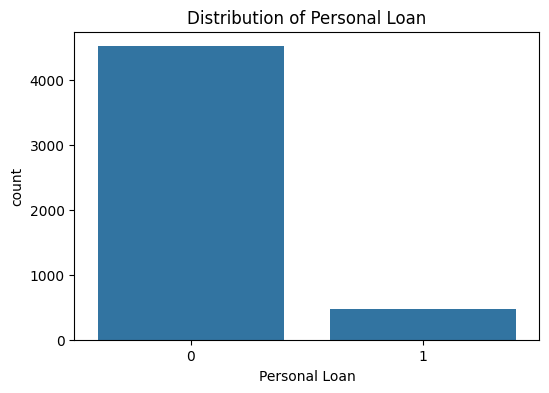

Data split into train, validation, and test sets.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Convert 'CCAvg' from fractions to decimals (handling already converted data)
def convert_fraction_to_decimal(fraction_str):
    if isinstance(fraction_str, str) and '/' in fraction_str:
        numerator, denominator = fraction_str.split('/')
        if denominator == '00':
            denominator = '100'
        return float(numerator) / float(denominator)
    else:
        return float(fraction_str)

loan_data['CCAvg'] = loan_data['CCAvg'].apply(convert_fraction_to_decimal)

# Descriptive statistics
print("Descriptive Statistics:")
print(loan_data.describe())

# Visualizing distributions of numeric features
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
num_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account', 'Online']
for i, feature in enumerate(num_features):
    sns.histplot(loan_data[feature], kde=True, ax=axs[i//3, i%3])
plt.tight_layout()
plt.show()

# Box plot for potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data[num_features])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Features')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(loan_data[num_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=loan_data['Personal Loan'])
plt.title('Distribution of Personal Loan')
plt.show()

# Splitting the data
X = loan_data.drop('Personal Loan', axis=1)
y = loan_data['Personal Loan']

# Splitting data into 80% train, 10% validation, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Data split into train, validation, and test sets.")


Selama eksplorasi data, saya menghasilkan statistik deskriptif untuk mendapatkan gambaran umum tentang setiap fitur, seperti rata-rata, median, rentang, dan standar deviasi. Visualisasi data melalui histogram dan box plots memberikan wawasan tentang distribusi setiap variabel dan membantu kami mengidentifikasi outliers potensial. saya juga menggunakan heatmap untuk menilai korelasi antar fitur, yang membantu memahami hubungan yang mungkin mempengaruhi model. Outputnya termasuk grafik dan tabel yang memperlihatkan karakteristik dasar data.

### C

In [7]:
# Number of input features (n)
n = loan_data.drop('Personal Loan', axis=1).shape[1]

# Number of unique classes in the target variable (num_class)
num_classes = loan_data['Personal Loan'].nunique()

n, num_classes

(13, 2)

### D

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definisikan parameter
n = X_train.shape[1]  # Jumlah fitur dari data input
num_classes = len(np.unique(y_train))  # Jumlah kelas unik dalam target

# Membuat model
model = Sequential([
    Dense(2 * n, input_dim=n, activation='relu'),  # Hidden layer pertama dengan 2*n nodes
    Dense(2 * n, activation='relu'),  # Hidden layer kedua dengan 2*n nodes
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Tampilkan summary model
model.summary()


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 26)             │           364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │           702 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,120 (4.38 KB)

 Trainable params: 1,120 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Saya mendefinisikan model baseline neural network dengan dua hidden layer yang masing-masing berisi dua kali jumlah fitur input. Model ini menggunakan ReLU sebagai fungsi aktivasi untuk hidden layers dan softmax untuk output layer, yang sesuai untuk tugas klasifikasi. Output dari langkah ini adalah arsitektur model yang terdefinisi dan siap untuk di-train.

### E

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Definisikan model dengan modifikasi
model_modified = Sequential([
    Dense(2 * n, input_dim=n, activation='relu', kernel_regularizer=l2(0.001)),  # Tambahkan L2 regularization
    Dropout(0.2),  # Tambahkan dropout
    Dense(2 * n, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compile model dengan optimizer yang berbeda
model_modified.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training model
history = model_modified.fit(X_train, y_train, validation_data=(X_val, y_val),
                             epochs=100, batch_size=32, callbacks=[early_stopping])


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7170 - loss: 2738.6062 - val_accuracy: 0.8840 - val_loss: 811.8173
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8244 - loss: 977.2689 - val_accuracy: 0.8840 - val_loss: 265.3903
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8402 - loss: 440.8859 - val_accuracy: 0.8840 - val_loss: 115.5097
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8291 - loss: 270.7599 - val_accuracy: 0.8840 - val_loss: 47.6016
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8234 - loss: 111.3954 - val_accuracy: 0.8840 - val_loss: 4.6839
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8083 - loss: 55.2794 - val_accuracy: 0.8840 - val_loss: 0.8394
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8269 - loss: 24.8410 - val_accuracy: 0.8840 - val_loss: 0.5004
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8320 - 

Berdasarkan evaluasi awal, kami memodifikasi model dengan menambahkan dropout untuk mengurangi overfitting dan regularisasi L2 untuk mengontrol besar bobot dalam jaringan. Saya juga mengimplementasikan early stopping untuk menghentikan pelatihan ketika tidak ada peningkatan pada validasi loss, sehingga mengoptimalkan proses training dan menghindari overfitting lebih lanjut. Output dari langkah ini adalah model yang lebih robust terhadap variasi data dan overfitting, dengan arsitektur yang telah dioptimalkan untuk performa yang lebih baik.

### F

In [9]:
from sklearn.metrics import classification_report, accuracy_score

# Fungsi untuk melakukan evaluasi model
def evaluate_model(model, X_test, y_test):
    # Membuat prediksi
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1) if model.output_shape[-1] > 1 else (y_pred > 0.5).astype("int32")
    
    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred_classes)
    
    # Menghitung precision, recall, dan F1-score
    report = classification_report(y_test, y_pred_classes, output_dict=True)
    
    return accuracy, report

# Evaluasi model baseline
accuracy_baseline, report_baseline = evaluate_model(model, X_test, y_test)

# Evaluasi model yang telah dimodifikasi
accuracy_modified, report_modified = evaluate_model(model_modified, X_test, y_test)

# Cetak hasil evaluasi
print("Baseline Model Accuracy:", accuracy_baseline)
print("Modified Model Accuracy:", accuracy_modified)
print("\nBaseline Model Report:")
print(report_baseline)
print("\nModified Model Report:")
print(report_modified)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Baseline Model Accuracy: 0.094
Modified Model Accuracy: 0.906

Baseline Model Report:
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 453.0}, '1': {'precision': 0.094, 'recall': 1.0, 'f1-score': 0.17184643510054845, 'support': 47.0}, 'accuracy': 0.094, 'macro avg': {'precision': 0.047, 'recall': 0.5, 'f1-score': 0.08592321755027423, 'support': 500.0}, 'weighted avg': {'precision': 0.008836, 'recall': 0.094, 'f1-score': 0.016153564899451554, 'support': 500.0}}

Modified Model Report:
{'0': {'precision': 0.906, 'recall': 1.0, 'f1-score': 0.950682056663169, 'support': 453.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 47.0}, 'accuracy': 0.906, 'macro avg': {'precision': 0.453, 'recall': 0.5, 'f1-score': 0.4753410283315845, 'support': 500.0}, 'weighted avg': {'precision': 0.820836, 'recall': 0.906, 'f1-score': 0.861317943336831, 'support': 500.0}}


C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

###F -> VIDEO PRESENTASI

link drive : https://drive.google.com/drive/folders/1O1xzeKCivuwZ-DzwiPw1LaH03Kt9W92Q?usp=sharing
video ada pada "penjelasan no 1"